In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras



In [0]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM
from sklearn.model_selection import train_test_split

In [15]:
X = []
Y = []
X = [((x**2)/100) for x in range(50)]
Y = [(y * 2) for y in X]

print(X)
print(Y)

[0.0, 0.01, 0.04, 0.09, 0.16, 0.25, 0.36, 0.49, 0.64, 0.81, 1.0, 1.21, 1.44, 1.69, 1.96, 2.25, 2.56, 2.89, 3.24, 3.61, 4.0, 4.41, 4.84, 5.29, 5.76, 6.25, 6.76, 7.29, 7.84, 8.41, 9.0, 9.61, 10.24, 10.89, 11.56, 12.25, 12.96, 13.69, 14.44, 15.21, 16.0, 16.81, 17.64, 18.49, 19.36, 20.25, 21.16, 22.09, 23.04, 24.01]
[0.0, 0.02, 0.08, 0.18, 0.32, 0.5, 0.72, 0.98, 1.28, 1.62, 2.0, 2.42, 2.88, 3.38, 3.92, 4.5, 5.12, 5.78, 6.48, 7.22, 8.0, 8.82, 9.68, 10.58, 11.52, 12.5, 13.52, 14.58, 15.68, 16.82, 18.0, 19.22, 20.48, 21.78, 23.12, 24.5, 25.92, 27.38, 28.88, 30.42, 32.0, 33.62, 35.28, 36.98, 38.72, 40.5, 42.32, 44.18, 46.08, 48.02]


In [0]:
x = np.array(X,dtype=float)
y = np.array(Y,dtype=float)



In [0]:
x = np.array(x).reshape(50, 1, 1)

In [21]:
x.shape

(50, 1, 1)

In [22]:
y.shape

(50,)

In [0]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=4)


In [24]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(1, 1)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 1, 50)             10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________
None


In [25]:
history = model.fit(x_train,y_train,epochs=1000,validation_data=(x_test,y_test))

Train on 40 samples, validate on 10 samples
Epoch 1/1000
40/40 [==============================] - 2s 38ms/step - loss: 498.0810 - val_loss: 383.1379
Epoch 2/1000
40/40 [==============================] - 0s 433us/step - loss: 497.2370 - val_loss: 382.5417
Epoch 3/1000
40/40 [==============================] - 0s 368us/step - loss: 496.4755 - val_loss: 381.8983
Epoch 4/1000
40/40 [==============================] - 0s 374us/step - loss: 495.6144 - val_loss: 381.2215
Epoch 5/1000
40/40 [==============================] - 0s 431us/step - loss: 494.7989 - val_loss: 380.4965
Epoch 6/1000
40/40 [==============================] - 0s 422us/step - loss: 493.8946 - val_loss: 379.7173
Epoch 7/1000
40/40 [==============================] - 0s 432us/step - loss: 492.8654 - val_loss: 378.8539
Epoch 8/1000
40/40 [==============================] - 0s 427us/step - loss: 491.8583 - val_loss: 377.9281
Epoch 9/1000
40/40 [==============================] - 0s 384us/step - loss: 490.5942 - val_loss: 376.9080
Epo

In [0]:
results = model.predict(x_test)

In [28]:
results.shape

(10, 1)

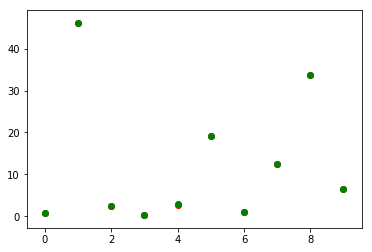

In [29]:
plt.scatter(range(10),results,c='r')
plt.scatter(range(10),y_test,c='g')
plt.show()